In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress

#import api_key
#from api_keys import api_key



In [2]:
#Is a Country’s GDP have any correlation to the Country’s Olympic performance? (Louis)
     #1. Describe the anlysis process (code used to analyize the data)
     #2.Summary of conclusions (incld. visisualization - plots) implications of your findings

In [3]:
#What is the percentage of GDP spent by the Country? Do the Olympic games have an adverse or beneficial effect on the host Country’s GDP? (Jacob)
     #1. Describe the anlysis process (code used to analyize the data)
     #2.Summary of conclusions (incld. visisualization - plots) implications of your findings


In [4]:
#How do major events(wars) affect the Country’s Olympic performance & attendance? (Nico)
     #1. Describe the anlysis process (code used to analyize the data)
     #2.Summary of conclusions (incld. visisualization - plots) implications of your findings


athlete_data_to_load = 'raw data files/Olympic data/athlete_events.csv'
summer_data_to_load = 'raw data files/Olympic data/summer.csv'
winter_data_to_load = 'raw data files/Olympic data/winter.csv'

athlete_data = pd.read_csv(athlete_data_to_load)
summer_data = pd.read_csv(summer_data_to_load)
winter_data = pd.read_csv(summer_data_to_load)

In [5]:
athlete_data = athlete_data[athlete_data['Year'] !=1904]
athlete_data = athlete_data[athlete_data['Year'] !=1900] 
athlete_data = athlete_data[athlete_data['Year'] !=1908] 
athlete_data_grouped = athlete_data.groupby('Team')
athlete_data_grouped.count().sort_values(by = 'Name', ascending = False).head()



,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
Team,,,,,,,,,,,,,,
United States,16691,16691,16691,16625,13962,13517,16691,16691,16691,16691,16691,16691,16691,4910
France,11015,11015,11015,10445,8042,7830,11015,11015,11015,11015,11015,11015,11015,1438
Great Britain,10592,10592,10592,10196,7581,7497,10592,10592,10592,10592,10592,10592,10592,1482
Italy,10126,10126,10126,9823,7763,7454,10126,10126,10126,10126,10126,10126,10126,1514
Canada,9124,9124,9124,8977,7792,7690,9124,9124,9124,9124,9124,9124,9124,1202


In [6]:
athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# United States

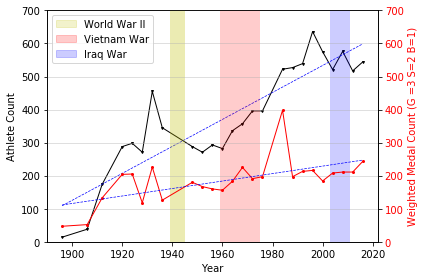

In [7]:
import matplotlib.patches as mpatches

#Athlete Count Statistics for Summer

usa_summer_data = athlete_data.loc[athlete_data['Team']=='United States'].loc[athlete_data['Season']=='Summer']
usa_summer_data_count = usa_summer_data.groupby(['Year'])['Name'].nunique()
usa_summer_data_df = pd.DataFrame(usa_summer_data_count).rename(columns = {'Name':'Athlete Count'})

#USA Medal Count
usa_medals = pd.DataFrame()
usa_medals['Gold'] = usa_summer_data.loc[usa_summer_data['Medal']=='Gold'].groupby('Year')['Event'].nunique()
usa_medals['Silver']= usa_summer_data.loc[usa_summer_data['Medal']=='Silver'].groupby('Year')['Event'].nunique()
usa_medals['Bronze'] = usa_summer_data.loc[usa_summer_data['Medal']=='Bronze'].groupby('Year')['Event'].nunique()
usa_medals['Total Value'] = ''

for i,j in usa_medals.iterrows():
    usa_medals.loc[i,'Total Value'] = (usa_medals['Gold'][i] *3) + (usa_medals['Silver'][i] *2) + (usa_medals['Bronze'][i])

#Line Of Regression

(slope, intercept, _, _, _) = linregress(usa_summer_data_df.index,  usa_summer_data_df['Athlete Count'])
usa_summer_athlete_fit = slope * usa_summer_data_df.index + intercept
(slope, intercept, _, _, _) = linregress(usa_medals.index,  usa_medals['Total Value'])
usa_summer_medal_fit = slope * usa_medals.index + intercept

#Summer Plot

fig, ax1 = plt.subplots()

ax1.plot(usa_summer_data_df.index, usa_summer_data_df['Athlete Count'], color = 'black', marker = 'v',markersize = 2, linewidth = 1)
ax1.plot(usa_summer_data_df.index, usa_summer_athlete_fit, 'b--', linewidth = 0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Athlete Count')
ax1.set_ylim([0,700])
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()

ax2.plot(usa_medals.index, usa_medals['Total Value'], color = 'red', marker = 'o',markersize = 2, linewidth = 1)
ax2.plot(usa_medals.index, usa_summer_medal_fit, 'b--', linewidth = 0.7)
ax2.set_ylabel('Weighted Medal Count (G =3 S=2 B=1)', color = 'r')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0,700])

fig.tight_layout()

grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'y')
vietnam = plt.axvspan(1959,1975,0,1, alpha = 0.2, facecolor = 'r')
iraq = plt.axvspan(2003, 2011, 0, 1, alpha = 0.2, facecolor = 'b', label = 'Iraq War')

yellow_patch = mpatches.Patch(color='y', alpha = 0.2, label='World War II')
red_patch = mpatches.Patch(color = 'r', alpha = 0.2, label = 'Vietnam War')
blue_patch = mpatches.Patch(color = 'b', alpha = 0.2, label = 'Iraq War')

plt.legend(handles=[yellow_patch, red_patch, blue_patch])


    

# Soviet Union/Russia

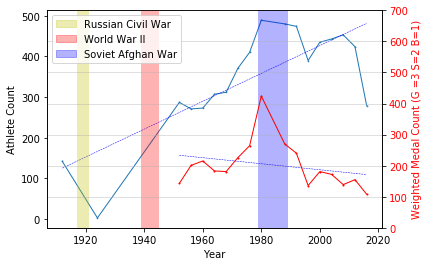

In [8]:
#Athlete Counts
soviet_summer_data = athlete_data.loc[athlete_data['Team'].isin(['Russia','Soviet Union', 'Unified Team'])].loc[athlete_data['Season']=='Summer']
soviet_summer_data_count = soviet_summer_data.groupby(['Year'])['Name'].nunique()
soviet_summer_data_df = pd.DataFrame(soviet_summer_data_count).rename(columns = {'Name':'Athlete Count'})

#USA Medal Count
soviet_medals = pd.DataFrame()
soviet_medals['Gold'] = soviet_summer_data.loc[soviet_summer_data['Medal']=='Gold'].groupby('Year')['Event'].nunique()
soviet_medals['Silver']= soviet_summer_data.loc[soviet_summer_data['Medal']=='Silver'].groupby('Year')['Event'].nunique()
soviet_medals['Bronze'] = soviet_summer_data.loc[soviet_summer_data['Medal']=='Bronze'].groupby('Year')['Event'].nunique()
soviet_medals['Total Value'] = ''

for i,j in soviet_medals.iterrows():
    soviet_medals.loc[i,'Total Value'] = (soviet_medals['Gold'][i] *3) + (soviet_medals['Silver'][i] *2) + (soviet_medals['Bronze'][i])
    
#Line Of Regression

(slope, intercept, _, _, _) = linregress(soviet_summer_data_df.index,  soviet_summer_data_df['Athlete Count'])
soviet_summer_athlete_fit = slope * soviet_summer_data_df.index + intercept
(slope, intercept, _, _, _) = linregress(soviet_medals.index,  soviet_medals['Total Value'])
soviet_summer_medal_fit = slope * soviet_medals.index + intercept

#Figures
fig, ax1 = plt.subplots()

ax1.plot(soviet_summer_data_df.index, soviet_summer_data_df['Athlete Count'], linewidth = 1, marker = 'v', markersize = 1,)
ax1.plot(soviet_summer_data_df.index, soviet_summer_athlete_fit, 'b--', linewidth = 0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Athlete Count')
ax1.tick_params(axis = 'y', labelcolor = 'black')

ax2 = ax1.twinx()

ax2.plot(soviet_medals.index, soviet_medals['Total Value'], color = 'r', linewidth = 1, marker = 'o',markersize = 1)
ax2.plot(soviet_medals.index, soviet_summer_medal_fit, 'b--', linewidth = 0.5)
ax2.set_ylabel('Weighted Medal Count (G =3 S=2 B=1)', color = 'r')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0,700])


grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
wwI = plt.axvspan(1917,1921,0,1, alpha = 0.3, facecolor = 'y')
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'r')
soviet_afghan = plt.axvspan(1979, 1989, 0, 1, alpha = 0.3, facecolor = 'b')

yellow_patch = mpatches.Patch(color='y', alpha = 0.3, label='Russian Civil War')
red_patch = mpatches.Patch(color = 'r', alpha = 0.3, label = 'World War II')
blue_patch = mpatches.Patch(color = 'b', alpha = 0.3, label = 'Soviet Afghan War')

plt.legend(handles=[yellow_patch, red_patch, blue_patch], loc='upper left')

# Germany

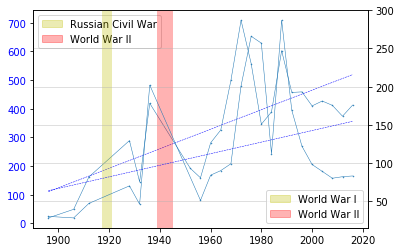

In [9]:
germany_summer_data = athlete_data.loc[athlete_data['Team'].isin(['Germany','East Germany', 'West Germany'])].loc[athlete_data['Season']=='Summer']
germany_summer_data_count = germany_summer_data.groupby(['Year'])['Name'].nunique()
germany_summer_data_df = pd.DataFrame(germany_summer_data_count).rename(columns = {'Name':'Athlete Count'})

germany_medals = pd.DataFrame()
germany_medals['Gold'] = germany_summer_data.loc[germany_summer_data['Medal']=='Gold'].groupby('Year')['Event'].nunique()
germany_medals['Silver']= germany_summer_data.loc[germany_summer_data['Medal']=='Silver'].groupby('Year')['Event'].nunique()
germany_medals['Bronze'] = germany_summer_data.loc[germany_summer_data['Medal']=='Bronze'].groupby('Year')['Event'].nunique()
germany_medals['Total Value'] = ''

for i,j in germany_medals.iterrows():
    germany_medals.loc[i,'Total Value'] = (germany_medals['Gold'][i] *3) + (germany_medals['Silver'][i] *2) + (germany_medals['Bronze'][i])
germany_medals    


(slope, intercept, _, _, _) = linregress(germany_summer_data_df.index,  germany_summer_data_df['Athlete Count'])
germany_summer_athlete_fit = slope * germany_summer_data_df.index + intercept
(slope, intercept, _, _, _) = linregress(germany_medals.index,  germany_medals['Total Value'])
germany_summer_medal_fit = slope * germany_medals.index + intercept

fig, ax1 = plt.subplots()

ax1.plot(germany_summer_data_df.index, germany_summer_data_df['Athlete Count'], marker = 'o',linewidth = 0.5, markersize = 0.5,)
ax1.plot(germany_summer_data_df.index, germany_summer_athlete_fit, 'b--', linewidth = 0.5)
ax1.tick_params(axis = 'y', labelcolor = 'blue')



plt.legend(handles=[yellow_patch, red_patch], loc = 'best')

ax2 = ax1.twinx()

ax2.plot(germany_medals.index, germany_medals['Total Value'], marker = 'o',markersize = 0.5, linewidth = 0.5)
ax2.plot(germany_medals.index, germany_summer_medal_fit, 'b--', linewidth = 0.5)
grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)

ax2.tick_params(axis='y',labelcolor = 'black')





grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
wwI = plt.axvspan(1917,1921,0,1, alpha = 0.3, facecolor = 'y')
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'r')

yellow_patch = mpatches.Patch(color='y', alpha = 0.3, label='World War I')
red_patch = mpatches.Patch(color = 'r', alpha = 0.3, label = 'World War II')

plt.legend(handles=[yellow_patch, red_patch], loc = 'best')


# France

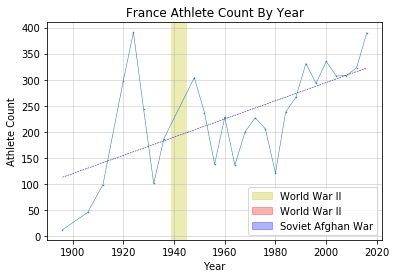

Text(0, 0.5, 'Year')

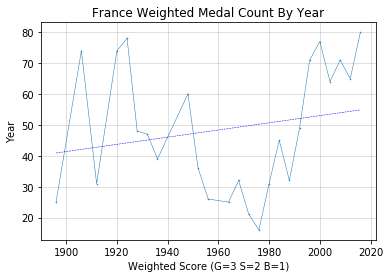

In [10]:
#Athlete Count Statistics for Summer

france_summer_data = athlete_data.loc[athlete_data['Team']=='France'].loc[athlete_data['Season']=='Summer']
france_summer_data_count = france_summer_data.groupby(['Year'])['Name'].nunique()
france_summer_data_df = pd.DataFrame(france_summer_data_count).rename(columns = {'Name':'Athlete Count'})

#USA Medal Count
france_medals = pd.DataFrame()
france_medals['Gold'] = france_summer_data.loc[france_summer_data['Medal']=='Gold'].groupby('Year')['Event'].nunique()
france_medals['Silver']= france_summer_data.loc[france_summer_data['Medal']=='Silver'].groupby('Year')['Event'].nunique()
france_medals['Bronze'] = france_summer_data.loc[france_summer_data['Medal']=='Bronze'].groupby('Year')['Event'].nunique()
france_medals['Total Value'] = ''

for i,j in france_medals.iterrows():
    france_medals.loc[i,'Total Value'] = (france_medals['Gold'][i] *3) + (france_medals['Silver'][i] *2) + (france_medals['Bronze'][i])

#Line Of Regression

(slope, intercept, _, _, _) = linregress(france_summer_data_df.index,  france_summer_data_df['Athlete Count'])
france_summer_athlete_fit = slope * france_summer_data_df.index + intercept
(slope, intercept, _, _, _) = linregress(france_medals.index,  france_medals['Total Value'])
france_summer_medal_fit = slope * france_medals.index + intercept

#Summer Plot
plt.plot(france_summer_data_df.index, france_summer_data_df['Athlete Count'], marker = 'o',markersize = 0.5, linewidth = 0.5)
plt.plot(france_summer_data_df.index, france_summer_athlete_fit, 'b--', linewidth = 0.5)

grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'y')
#vietnam = plt.axvspan(1959,1975,0,1, alpha = 0.3, facecolor = 'r')
#iraq = plt.axvspan(2003, 2011, 0, 1, alpha = 0.3, facecolor = 'b', label = 'Iraq War')

yellow_patch = mpatches.Patch(color='y', alpha = 0.3, label='World War II')
#red_patch = mpatches.Patch(color = 'r', alpha = 0.3, label = 'Vietnam War')
#blue_patch = mpatches.Patch(color = 'b', alpha = 0.3, label = 'Iraq War')

plt.legend(handles=[yellow_patch, red_patch, blue_patch])
plt.xlabel('Year')
plt.ylabel('Athlete Count')
plt.title('France Athlete Count By Year')

plt.show()
plt.plot(france_medals.index, france_medals['Total Value'], marker = 'o',markersize = 0.5, linewidth = 0.5)
plt.plot(france_medals.index, france_summer_medal_fit, 'b--', linewidth = 0.5)
grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
plt.title("France Weighted Medal Count By Year")
plt.xlabel("Weighted Score (G=3 S=2 B=1)")
plt.ylabel("Year")


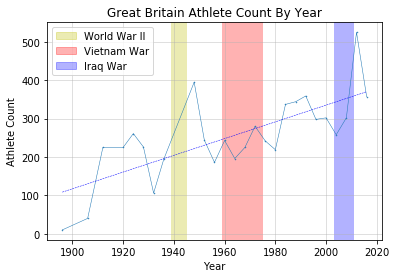

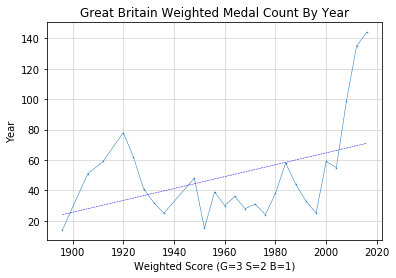

In [11]:
import matplotlib.patches as mpatches

#Athlete Count Statistics for Summer

gb_summer_data = athlete_data.loc[athlete_data['Team']=='Great Britain'].loc[athlete_data['Season']=='Summer']
gb_summer_data_count = gb_summer_data.groupby(['Year'])['Name'].nunique()
gb_summer_data_df = pd.DataFrame(gb_summer_data_count).rename(columns = {'Name':'Athlete Count'})

#USA Medal Count
gb_medals = pd.DataFrame()
gb_medals['Gold'] = gb_summer_data.loc[gb_summer_data['Medal']=='Gold'].groupby('Year')['Event'].nunique()
gb_medals['Silver']= gb_summer_data.loc[gb_summer_data['Medal']=='Silver'].groupby('Year')['Event'].nunique()
gb_medals['Bronze'] = gb_summer_data.loc[gb_summer_data['Medal']=='Bronze'].groupby('Year')['Event'].nunique()
gb_medals['Total Value'] = ''

for i,j in gb_medals.iterrows():
    gb_medals.loc[i,'Total Value'] = (gb_medals['Gold'][i] *3) + (gb_medals['Silver'][i] *2) + (gb_medals['Bronze'][i])

#Line Of Regression

(slope, intercept, _, _, _) = linregress(gb_summer_data_df.index,  gb_summer_data_df['Athlete Count'])
gb_summer_athlete_fit = slope * gb_summer_data_df.index + intercept
(slope, intercept, _, _, _) = linregress(gb_medals.index, gb_medals['Total Value'])
gb_summer_medal_fit = slope * gb_medals.index + intercept

#Summer Plot
plt.plot(gb_summer_data_df.index, gb_summer_data_df['Athlete Count'], marker = 'o',markersize = 0.5, linewidth = 0.5)
plt.plot(gb_summer_data_df.index, gb_summer_athlete_fit, 'b--', linewidth = 0.5)

grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'y')
vietnam = plt.axvspan(1959,1975,0,1, alpha = 0.3, facecolor = 'r')
iraq = plt.axvspan(2003, 2011, 0, 1, alpha = 0.3, facecolor = 'b', label = 'Iraq War')

yellow_patch = mpatches.Patch(color='y', alpha = 0.3, label='World War II')
red_patch = mpatches.Patch(color = 'r', alpha = 0.3, label = 'Vietnam War')
blue_patch = mpatches.Patch(color = 'b', alpha = 0.3, label = 'Iraq War')

plt.legend(handles=[yellow_patch, red_patch, blue_patch])
plt.xlabel('Year')
plt.ylabel('Athlete Count')
plt.title('Great Britain Athlete Count By Year')

plt.show()
plt.plot(gb_medals.index, gb_medals['Total Value'], marker = 'o',markersize = 0.5, linewidth = 0.5)
plt.plot(gb_medals.index, gb_summer_medal_fit, 'b--', linewidth = 0.5)
grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
plt.title("Great Britain Weighted Medal Count By Year")
plt.xlabel("Weighted Score (G=3 S=2 B=1)")
plt.ylabel("Year")
plt.show()
